<a href="https://colab.research.google.com/github/karansjc1/Image-Modifications/blob/master/image_modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Please follow these instructions**

---



# Steps to modify your image : 

1.   **Run all** cells by one of the following ways : 

*   Pressing Shift+Enter on each cell
*   Clicking on the runtime tab on the top and then clicking on the run all option.

2.  Now go to the last cell of the code (bottom of the code).

3.   Then you will see a Choose files option click on it to choose files from your system(Note: I recommend using one pic at a time and using landscape images for the time being i will update this soon).

4.   Now you will get a list of commands so enter the command that you want to enter and press enter.

5.   If you want to download the displayed image type y and press enter and your image will be downloaded.



In [ ]:
from torchvision import models
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
import time
from google.colab import files
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

In [ ]:
def crop(image, source, nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  foreground=cv2.imread(source)
  
  foreground=cv2.cvtColor(foreground,cv2.COLOR_BGR2RGB)
  foreground=cv2.resize(foreground,(r.shape[1],r.shape[0]))
  
  background=255*np.ones_like(rgb).astype(np.uint8)

  foreground=foreground.astype(float)
  background=background.astype(float)
  
  th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

  alpha=alpha.astype(float)/255

  foreground=cv2.multiply(alpha,foreground)

  background=cv2.multiply(1.0-alpha,background)

  outImage=cv2.add(foreground,background)

  return outImage/255
  
  

In [ ]:
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

In [ ]:
def back_change(image, source,bgim, nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  foreground=cv2.imread(source)
  
  background=cv2.imread(bgim)

  foreground=cv2.cvtColor(foreground,cv2.COLOR_BGR2RGB)
  foreground=cv2.resize(foreground,(r.shape[1],r.shape[0]))
  
  background=cv2.cvtColor(background,cv2.COLOR_BGR2RGB)
  background=cv2.resize(background,(r.shape[1],r.shape[0]))
  
  foreground=foreground.astype(float)
  background=background.astype(float)
  
  th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

  alpha=cv2.GaussianBlur(alpha,(7,7),0)

  alpha=alpha.astype(float)/255

  foreground=cv2.multiply(alpha,foreground)

  background=cv2.multiply(1.0-alpha,background)

  outImage=cv2.add(foreground,background)

  return outImage/255
  
  

In [ ]:
def back_blur(image,source,nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  foreground=cv2.imread(source)
  
  foreground=cv2.cvtColor(foreground,cv2.COLOR_BGR2RGB)
  foreground=cv2.resize(foreground,(r.shape[1],r.shape[0]))
  
  blurImg=cv2.GaussianBlur(foreground,(7,7),0)
  
  foreground=foreground.astype(float)
  blurImg=blurImg.astype(float)

  th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

  alpha=cv2.GaussianBlur(alpha,(7,7),0)

  alpha=alpha.astype(float)/255

  foreground=cv2.multiply(alpha,foreground)

  background=cv2.multiply(1.0-alpha,blurImg)

  outImage=cv2.add(foreground,background)

  return outImage/255

In [ ]:
def gray_back(image,source,nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  foreground=cv2.imread(source)
  
  foreground=cv2.cvtColor(foreground,cv2.COLOR_BGR2RGB)
  foreground=cv2.resize(foreground,(r.shape[1],r.shape[0]))
  
  background=cv2.cvtColor(foreground,cv2.COLOR_BGR2GRAY)
  background=cv2.cvtColor(background,cv2.COLOR_GRAY2RGB)
  
  foreground=foreground.astype(float)
  background=background.astype(float)

  th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

  alpha=cv2.GaussianBlur(alpha,(7,7),0)

  alpha=alpha.astype(float)/255

  foreground=cv2.multiply(alpha,foreground)

  background=cv2.multiply(1.0-alpha,background)

  outImage=cv2.add(foreground,background)

  return outImage/255

In [ ]:
def gray_blur(image,source,nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  foreground=cv2.imread(source)
  
  foreground=cv2.cvtColor(foreground,cv2.COLOR_BGR2RGB)
  foreground=cv2.resize(foreground,(r.shape[1],r.shape[0]))
  
  background=cv2.cvtColor(foreground,cv2.COLOR_BGR2GRAY)
  background=cv2.cvtColor(background,cv2.COLOR_GRAY2RGB)
  background=cv2.GaussianBlur(background,(41,41),0)

  foreground=foreground.astype(float)
  background=background.astype(float)

  th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)

  alpha=cv2.GaussianBlur(alpha,(7,7),0)

  alpha=alpha.astype(float)/255

  foreground=cv2.multiply(alpha,foreground)

  background=cv2.multiply(1.0-alpha,background)

  outImage=cv2.add(foreground,background)

  return outImage/255

In [ ]:
def modify():
  uploaded=files.upload()
  for fn in uploaded.keys():
    path='/content/'+fn
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
    img = Image.open(path)
    plt.imshow(img); plt.axis('off'); plt.show()
    trf = T.Compose([T.Resize(640),
                     T.ToTensor(),
                     T.Normalize(mean = [0.485, 0.456, 0.406], 
                                 std = [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0)
    out = dlab(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    print('''Enter the command from the list of commands for the processing of the image which is as follows:\n 
    1.Crop - for cropping the background of the image\n
    2.Back blur - for background blur\n
    3.Grayscale blur - for blurring the background and also converting the background in grayscale(black and white blur)\n
    4.Grayscale back - for converting background to grayscale''')

    command=input().lower()

    if command=='crop':
      result = crop(om,path)
    elif command=='back blur':
      result = back_blur(om,path)
    elif command=='grayscale back':
      result = gray_back(om,path)
    elif command=='grayscale blur':
      result = gray_blur(om,path)
    
    plt.imshow(result); plt.axis('off'); plt.show()

    save=input('Do you want to download the result? If yes then type y or type n : ').lower()
    if save=='y':
      result = cv2.convertScaleAbs(result, alpha=(255.0))
      result = cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
      cv2.imwrite('/content/output.png',result,[cv2.IMWRITE_JPEG_QUALITY,100])
      print('Please wait your image will start downloading')
      time.sleep(10)
      files.download('output.png')

Saving IMG-20191126-WA0009.jpg to IMG-20191126-WA0009 (4).jpg
User uploaded file "IMG-20191126-WA0009.jpg" with length 163546 bytes


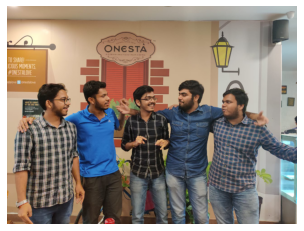

Enter the command from the list of commands for the processing of the image which is as follows:
 
    1.Crop - for cropping the background of the image

    2.Back blur - for background blur

    3.Grayscale blur - for blurring the background and also converting the background in grayscale(black and white blur)

    4.Grayscale back - for converting background to grayscale
Grayscale back


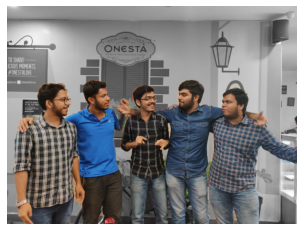

Do you want to download the result? If yes then type y or type n : y
Please wait your image will start downloading


MessageError: ignored

In [ ]:
modify()